<a href="https://colab.research.google.com/github/Habib-20/kel1-project-apm/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
%matplotlib inline

In [18]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.drop('CustomerID',axis=1,inplace=True)
df=df.rename({'Genre':'Gender'},axis='columns')
df['Gender']=df.Gender.map({'Male':0,'Female':1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


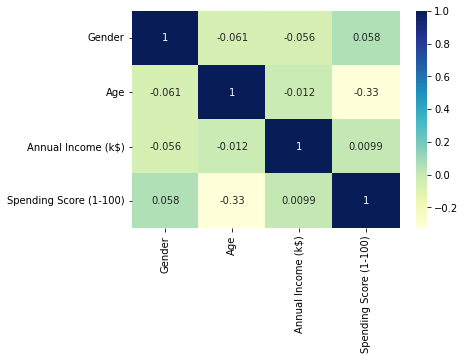

In [20]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [21]:
pca = PCA(n_components=2)
df= pca.fit_transform(df)
df.shape

(200, 2)

In [22]:
km= KMeans(n_clusters=3,random_state=42)
km

KMeans(n_clusters=3, random_state=42)

In [23]:
label = km.fit_predict(df)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [24]:
label_0 = df[label == 0]
label_0.shape

(123, 2)

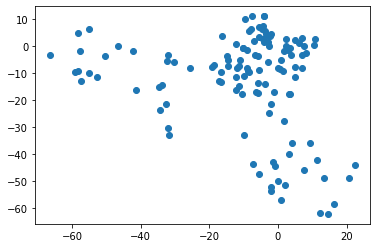

In [25]:
plt.scatter(label_0[:,0],label_0[:,1])
plt.show()

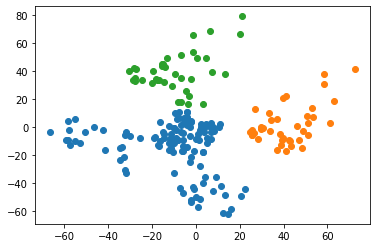

In [26]:
label_0 = df[label == 0]
label_1 = df[label == 1]
label_2 = df[label == 2]

plt.scatter(label_0[:,0],label_0[:,1])
plt.scatter(label_1[:,0],label_1[:,1])
plt.scatter(label_2[:,0],label_2[:,1])

plt.show()

In [27]:
sse= []
for k in range(1,10):
    km= KMeans(n_clusters=k,random_state=42)
    km.fit_predict(df)
    sse.append(km.inertia_)
sse

[275534.65845691296,
 181555.52598360312,
 111540.69605479398,
 74664.8661231153,
 45092.05171373356,
 37876.15160246054,
 31221.028288291956,
 26054.946739777602,
 22500.431576224553]

Text(0, 0.5, 'Sum of Squared Error')

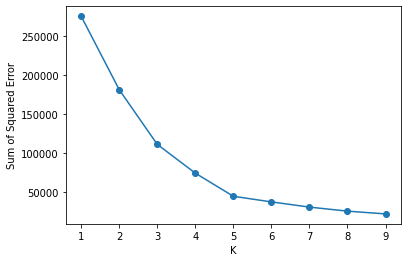

In [28]:
plt.plot(range(1,10),sse,marker='o')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

In [29]:
km = KMeans(n_clusters=5,random_state=42)
label = km.fit_predict(df)

u_labels= np.unique(label)

centroids= km.cluster_centers_
centroids

array([[ -4.41026389,  -3.10070422],
       [ 41.55103875,   1.87087541],
       [-44.38675468, -10.05043814],
       [-10.22445521,  42.33140596],
       [  4.98536192, -46.67336912]])

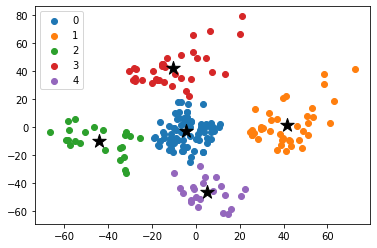

In [30]:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.legend()
plt.scatter(centroids[:,0] , centroids[:,1] , s=200, color = 'k',marker='*')   
plt.show()